# Generating a random data set

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [80]:
SPY_base = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()),'data','10_ETF','SPY.csv'))

In [81]:
SPY_base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,207.990005,208.190002,205.389999,205.539993,184.358871,130333800
1,2015-01-02,206.380005,206.880005,204.179993,205.429993,184.260223,121465900
2,2015-01-05,204.169998,204.369995,201.350006,201.720001,180.932541,169632600
3,2015-01-06,202.089996,202.720001,198.860001,199.820007,179.228363,209151400
4,2015-01-07,201.419998,202.720001,200.880005,202.309998,181.461731,125346700


In [82]:
rand_df = pd.DataFrame()

In [83]:
rand_df['Date'] = SPY_base['Date']

In [84]:
std_dev = ((SPY_base['Adj Close']-SPY_base['Adj Close'].shift(1))/(SPY_base['Adj Close']).mean()).std()

In [85]:
std_dev_open_close = ((SPY_base['Close']-SPY_base['Open'])/(SPY_base['Close']).mean()).std()

In [86]:
high_close = ((SPY_base['High']-SPY_base['Close'])/(SPY_base['Close']))
low_close = ((SPY_base['Close']-SPY_base['Low'])/(SPY_base['Close']))

In [87]:
rand_df['Adj Close'] = np.zeros(rand_df.shape[0])

In [88]:
rand_df['Adj Close'].iloc[0] = 1
for i in range(1,rand_df.shape[0]):
    rand_df['Adj Close'].iloc[i] = rand_df['Adj Close'].iloc[i-1]*(1+ np.random.normal(0,std_dev))
    

/Users/akshayghalsasi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [89]:
rand_df['Close']  = rand_df['Adj Close']

In [90]:
rand_df['Open'] = rand_df['Close']*(1+np.random.normal(0,std_dev_open_close,rand_df.shape[0]))
rand_df['High'] = rand_df['Close']*(1+np.random.choice(high_close,len(high_close)))
rand_df['Low'] = rand_df['Close']*(1-np.random.choice(high_close,len(high_close)))
rand_df['Volume'] = np.random.choice(SPY_base['Volume'],len(SPY_base['Volume']))

In [91]:
rand_df.head()

,Date,Adj Close,Close,Open,High,Low,Volume
0,2014-12-31,1.000000,1.000000,0.999397,1.004799,0.997453,50375400
1,2015-01-02,1.001405,1.001405,0.995914,1.001405,0.998073,109208400
2,2015-01-05,1.013764,1.013764,1.018296,1.025183,0.996171,163298800
3,2015-01-06,0.997060,0.997060,1.000607,1.002194,0.987466,57053600
4,2015-01-07,0.995204,0.995204,0.995752,1.004916,0.977436,179521200


In [61]:
os.path.join(os.path.abspath(os.getcwd()),'data','10_ETF','SPY.csv')

'/Users/akshayghalsasi/Dropbox/My Mac (Akshay’s MacBook Pro)/Desktop/Projects/Machine Learning Projects/Flatiron Projects/ETF_predictions/data/10_ETF/SPY.csv'

In [92]:
rand_df.to_csv(os.path.join(os.path.abspath(os.getcwd()),'data','10_ETF','random5.csv'))

<AxesSubplot:>

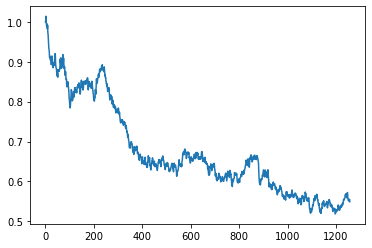

In [93]:
rand_df['Adj Close'].plot()

In [177]:
rand_df

,Date,Adj Close,Close,Open,High,Low,Volume
0,2014-12-31,1.000000,1.000000,0.993549,1.002882,0.993785,31995000
1,2015-01-02,1.004051,1.004051,0.993829,1.009242,1.000775,50550400
2,2015-01-05,0.998373,0.998373,1.004185,0.999504,0.996362,184513100
3,2015-01-06,0.999236,0.999236,1.011455,1.010621,0.998825,83524000
4,2015-01-07,1.004450,1.004450,1.007792,1.021975,1.003484,143798800
...,...,...,...,...,...,...,...
1253,2019-12-23,0.859156,0.859156,0.855243,0.860290,0.855438,95482000
1254,2019-12-24,0.866924,0.866924,0.874948,0.869428,0.840149,88939300
1255,2019-12-26,0.859933,0.859933,0.854644,0.861416,0.858870,85786800
1256,2019-12-27,0.853075,0.853075,0.854210,0.854952,0.852059,58191200
